# Beginner Basic Tensor Tutorial with pyTorch
https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html

In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2],[3,4]]
x_data = torch.tensor(data)

In [3]:
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [5]:
type(x_np)

torch.Tensor

In [6]:
x_ones = torch.ones_like(x_data)
# Ones Tensor
x_ones

tensor([[1, 1],
        [1, 1]])

In [7]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
# Random tensor
x_rand

tensor([[0.3293, 0.9251],
        [0.7682, 0.7799]])

In [8]:
shape = (2,3)
rand_tensor = torch.rand(shape)
rand_tensor

tensor([[0.2619, 0.1297, 0.6730],
        [0.3548, 0.4205, 0.2668]])

In [9]:
shape = (3,3)
ones_tensor = torch.ones(shape)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [10]:
zero_tensor = torch.zeros(shape)
zero_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [12]:
# CUDA
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

Standard numpy-like indexing and slicing:

In [13]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [14]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## **Arithmetic operations**

In [15]:
y1 = tensor @ tensor.T # matrice multiplication
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor.T)

torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [16]:
# Compute the element-wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [17]:
agg = tensor.sum()
agg

tensor(12.)

In [18]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [19]:
# In-place operations Operations that store the result into the operand are called in-place.

print(tensor, "\n")

tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## **Bridge with NumPy**

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [20]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [21]:
# A change in the tensor reflects in the NumPy array.

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [22]:
# NumPy array to Tensor

n = np.ones(5)
t = torch.from_numpy(n)

# Changes in the NumPy array reflects in the tensor.

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## **Loading a Dataset**

In [23]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## **Iterating and Visualizing the Dataset**

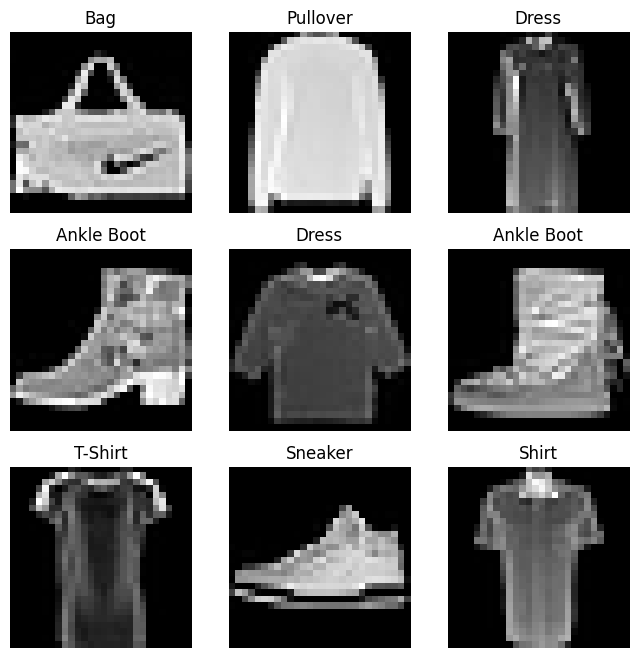

In [24]:
import matplotlib.pyplot as plt 

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## **Creating a Custom Dataset for your files**

In [25]:
import os
import pandas as pd
from torchvision.io import read_image
# Reads a JPEG or PNG image into a 3 dimensional RGB or grayscale Tensor.
# The values of the output tensor are uint8 in [0, 255].

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## **Preparing your data for training with DataLoaders**

In [27]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


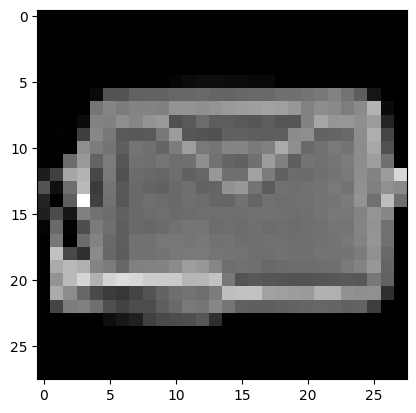

Label: 8


In [39]:
# Iterate through the DataLoader

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## **Transforms**

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic.

In [40]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

We define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.

In [41]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

# **Build the neural network**

In [42]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [43]:
# Get Device for Training

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


Every nn.Module subclass implements the operations on input data in the forward method.

In [44]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [45]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [48]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probability = nn.Softmax(dim=1)(logits) # Softmax normalizes the logits so that they sum up to 1.
y_pred = pred_probability.argmax(1) # Get highest value
print(f"Predicted class: {y_pred}")

Predicted class: tensor([6])


## **Model layers**

In [49]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [50]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [51]:
flat_image

tensor([[0.8015, 0.5600, 0.4817,  ..., 0.5165, 0.3027, 0.9735],
        [0.7153, 0.4791, 0.7899,  ..., 0.3816, 0.9128, 0.5689],
        [0.2837, 0.5419, 0.6967,  ..., 0.2290, 0.6156, 0.8596]])

In [52]:
# nn.Linear

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [53]:
hidden1

tensor([[-0.0820, -0.4721,  0.1161, -0.2520, -0.6887, -0.2089,  0.2329,  0.1347,
          0.0935, -0.5140,  0.1559, -0.5196,  0.1553,  0.5686,  0.7885, -0.0510,
          0.2283, -0.2823, -0.0568,  0.4534],
        [ 0.1817, -0.7637,  0.1235, -0.3274, -0.2350, -0.0250, -0.4189,  0.2522,
          0.2072, -0.0968,  0.3065, -0.6870,  0.4929,  0.4427,  0.5930, -0.0845,
          0.1819, -0.0975, -0.1131,  0.3023],
        [-0.0964, -0.8129,  0.0698, -0.4927, -0.5902,  0.3414, -0.2468,  0.3858,
          0.0492, -0.3094,  0.7612, -0.6003,  0.2638,  0.2273,  0.8604, -0.3426,
          0.1335, -0.1108, -0.0768,  0.4832]], grad_fn=<AddmmBackward0>)

In [54]:
# nn.ReLU

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0820, -0.4721,  0.1161, -0.2520, -0.6887, -0.2089,  0.2329,  0.1347,
          0.0935, -0.5140,  0.1559, -0.5196,  0.1553,  0.5686,  0.7885, -0.0510,
          0.2283, -0.2823, -0.0568,  0.4534],
        [ 0.1817, -0.7637,  0.1235, -0.3274, -0.2350, -0.0250, -0.4189,  0.2522,
          0.2072, -0.0968,  0.3065, -0.6870,  0.4929,  0.4427,  0.5930, -0.0845,
          0.1819, -0.0975, -0.1131,  0.3023],
        [-0.0964, -0.8129,  0.0698, -0.4927, -0.5902,  0.3414, -0.2468,  0.3858,
          0.0492, -0.3094,  0.7612, -0.6003,  0.2638,  0.2273,  0.8604, -0.3426,
          0.1335, -0.1108, -0.0768,  0.4832]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.1161, 0.0000, 0.0000, 0.0000, 0.2329, 0.1347, 0.0935,
         0.0000, 0.1559, 0.0000, 0.1553, 0.5686, 0.7885, 0.0000, 0.2283, 0.0000,
         0.0000, 0.4534],
        [0.1817, 0.0000, 0.1235, 0.0000, 0.0000, 0.0000, 0.0000, 0.2522, 0.2072,
         0.0000, 0.3065, 0.0000, 0.4929, 0.4427, 0.59

In [55]:
# nn.Sequential

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [56]:
logits

tensor([[-0.3154,  0.0188,  0.1308,  0.0808,  0.4028,  0.0965,  0.2365,  0.2900,
         -0.0600, -0.3783],
        [-0.2564,  0.0269,  0.1643,  0.0745,  0.2024,  0.1302,  0.1349,  0.2241,
          0.0615, -0.3827],
        [-0.2733,  0.0087,  0.3315,  0.0077,  0.1262,  0.0664,  0.2957,  0.2907,
         -0.1378, -0.3000]], grad_fn=<AddmmBackward0>)

In [58]:
# nn.Softmax

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

pred_probab

tensor([[0.0675, 0.0944, 0.1055, 0.1004, 0.1385, 0.1020, 0.1173, 0.1237, 0.0872,
         0.0634],
        [0.0733, 0.0973, 0.1116, 0.1020, 0.1159, 0.1079, 0.1084, 0.1185, 0.1007,
         0.0646],
        [0.0713, 0.0946, 0.1306, 0.0945, 0.1064, 0.1002, 0.1260, 0.1254, 0.0817,
         0.0694]], grad_fn=<SoftmaxBackward0>)

In [59]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0110,  0.0273, -0.0103,  ...,  0.0127,  0.0161,  0.0248],
        [ 0.0027, -0.0311,  0.0330,  ...,  0.0313,  0.0126, -0.0311]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0159, 0.0192], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0115, -0.0027, -0.0318,  ...,  0.0361,  0.0388, -0.0066],
        [-0.0188,  0.0213, -0.0323,  ..., -0.0201, -0.0225, -0.0248]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si